In [1]:
import gmplot
import pandas as pd
import requests 
import os
import math
from xml.etree.ElementTree import fromstring, ElementTree
from datetime import datetime
import json
import statistics 
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TrafficEvents = None

chunk_size = 1000

BASE_PATH = "/home/amin/CETI/RoadConstruction/TrafficEventData/part/speeds/speed_"
    
index_folder = 0
index_start_point_file = 0
index_end_point_file = 411

In [3]:
def read_data(path):
    data = None
    data = pd.read_csv(path)
    return data

In [4]:
def read_part_data(folder_id, index_start, index_end):
    df = None
    print("start time is {}".format(datetime.now()))
    for i in range(index_start, index_end):
        type_of_ways_all_points = []
        path = BASE_PATH + str(folder_id) + "/" + str(i) + "_file_"+ str(i) + ".csv"

        data = read_data(path)
        df = data.append(df, ignore_index = True)
    print("end time is {}".format(datetime.now()))
    return df

In [5]:
df = None
for i in range(0,8):
    print(i)
    data = read_part_data(i, 0, 411)
    df = data.append(df, ignore_index = True)
print(9)
data = read_part_data(9, 0, 393)
df = data.append(df, ignore_index = True)

0
start time is 2020-09-13 20:45:28.875052
end time is 2020-09-13 20:47:00.048474
1
start time is 2020-09-13 20:47:00.341142
end time is 2020-09-13 20:48:25.775194
2
start time is 2020-09-13 20:48:26.521921
end time is 2020-09-13 20:49:52.480240
3
start time is 2020-09-13 20:49:53.581561
end time is 2020-09-13 20:51:19.380396
4
start time is 2020-09-13 20:51:20.985110
end time is 2020-09-13 20:53:05.434365
5
start time is 2020-09-13 20:53:07.932214
end time is 2020-09-13 20:54:56.504713
6
start time is 2020-09-13 20:54:59.618523
end time is 2020-09-13 20:56:34.195143
7
start time is 2020-09-13 20:56:37.666817
end time is 2020-09-13 20:58:13.517261
9
start time is 2020-09-13 20:58:17.562556
end time is 2020-09-13 20:59:46.865860


In [6]:
df.head(-10)

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,Turning_Circle,Turning_Loop,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta
0,M-29450881,MapQuest,Construction,406.0,3,44.309494,-90.840271,NaN,NaN,0.860000,...,False,False,"{'waypoints': [{'nodes': [2147408021, 47184371...","{'waypoints': [{'nodes': [2147408021, 47184371...","[2147408021, 471843710, 2147408024, 2147408021...","[2147408021, 471843710, 2147408024, 2147408021...",motorway_link,-100.000000,-100.0,-100.0
1,M-29450890,MapQuest,Construction,703.0,2,44.387669,-88.720055,NaN,NaN,0.120000,...,False,False,"{'waypoints': [{'nodes': [232006634, 232006479...","{'waypoints': [{'nodes': [232006634, 232006479...","[232006634, 232006479, 2281677742, 232006634, ...","[232006634, 232006479, 2281677742, 232006634, ...",trunk,-100.000000,-100.0,-100.0
2,M-29450891,MapQuest,Construction,703.0,2,44.403862,-88.734856,NaN,NaN,0.000000,...,False,False,"{'waypoints': [{'nodes': [232006387, 232006382...","{'waypoints': [{'nodes': [232006387, 232006382...","[232006387, 232006382, 232006382, 231764181, 2...","[232006387, 232006382, 232006382, 231764181, 2...",trunk,-100.000000,-100.0,-100.0
3,M-29450947,MapQuest,Construction,735.0,3,44.734169,-90.497337,NaN,NaN,0.100000,...,False,False,"{'waypoints': [{'nodes': [147039746, 147017038...","{'waypoints': [{'nodes': [147039746, 147017038...","[147039746, 147017038, 147017038, 147017035, 1...","[147039746, 147017038, 147017038, 147017035, 1...",residential,-100.000000,-100.0,-100.0
4,M-29450948,MapQuest,Construction,735.0,3,44.734177,-90.496017,NaN,NaN,0.100000,...,False,False,"{'waypoints': [{'nodes': [3372527386, 14701703...","{'waypoints': [{'nodes': [3372527386, 14701703...","[3372527386, 147017032, 3372527390, 147017032,...","[3372527386, 147017032, 3372527390, 147017032,...",primary,-100.000000,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840485,B-7462,Bing,Construction,NaN,2,41.931130,-83.358570,41.90569,-83.36915,1.839975,...,False,False,"{'waypoints': [{'nodes': [185322523, 633371374...","{'waypoints': [{'nodes': [30455284, 30455283],...","[185322523, 6333713747, 185322523, 6333713746,...","[30455284, 30455283, 185370968, 30455284, 1853...",motorway,25.036195,2974.3,118.8
1840486,B-7474,Bing,Construction,NaN,2,39.500000,-84.730310,39.44563,-84.68347,4.511450,...,False,False,"{'waypoints': [{'nodes': [1939361949, 34293678...","{'waypoints': [{'nodes': [5406321562, 19657888...","[1939361949, 3429367817, 3304362560, 193936194...","[5406321562, 196578886, 5406321562, 5406321561...",primary,14.749443,7275.9,493.3
1840487,B-7475,Bing,Construction,NaN,2,39.445630,-84.683470,39.50000,-84.73031,4.511450,...,False,False,"{'waypoints': [{'nodes': [5406321562, 19657888...","{'waypoints': [{'nodes': [1939361949, 34293678...","[5406321562, 196578886, 5406321562, 5406321561...","[1939361949, 3429367817, 3304362560, 193936194...",primary,14.749443,7275.9,493.3
1840488,B-7550,Bing,Construction,NaN,2,38.322830,-85.712850,38.34191,-85.70634,1.364702,...,False,False,"{'waypoints': [{'nodes': [0, 179028919], 'hint...","{'waypoints': [{'nodes': [179028948, 179028949...","[0, 179028919, 0, 6892598514, 0, 6892598514, 6...","[179028948, 179028949, 179028949, 3994619357, ...",trunk,22.170170,2214.8,99.9


In [7]:
df_city = df.loc[:, df.columns.intersection(['City', "Id", "Source", "State"])]

In [8]:
df_city.head(-10)

,Id,Source,City,State
0,M-29450881,MapQuest,Black River Falls,WI
1,M-29450890,MapQuest,New London,WI
2,M-29450891,MapQuest,New London,WI
3,M-29450947,MapQuest,Loyal,WI
4,M-29450948,MapQuest,Loyal,WI
...,...,...,...,...
1840485,B-7462,Bing,Monroe,MI
1840486,B-7474,Bing,Oxford,OH
1840487,B-7475,Bing,Hamilton,OH
1840488,B-7550,Bing,Jeffersonville,IN


In [9]:
df_city_group = df_city.groupby(["City", "State"])

In [10]:
df_city_group.head()

,Id,Source,City,State
0,M-29450881,MapQuest,Black River Falls,WI
1,M-29450890,MapQuest,New London,WI
2,M-29450891,MapQuest,New London,WI
3,M-29450947,MapQuest,Loyal,WI
4,M-29450948,MapQuest,Loyal,WI
...,...,...,...,...
1840394,B-6382,Bing,Cardington,OH
1840395,B-6383,Bing,Cardington,OH
1840396,B-6392,Bing,Leavittsburg,OH
1840397,B-6393,Bing,Leavittsburg,OH


In [11]:
df_city_group_count = df_city_group.size().reset_index(name='counts')

In [12]:
df_city_group_count.head(20)

,City,State,counts
0,Aaronsburg,PA,6
1,Abbeville,AL,7
2,Abbeville,GA,3
3,Abbeville,LA,9
4,Abbeville,SC,1
5,Abbotsford,WI,15
6,Abbott,TX,9
7,Abbottstown,PA,56
8,Aberdeen,ID,2
9,Aberdeen,MD,94


In [13]:
df_city_group_count_sorted = df_city_group_count.sort_values(by=['counts'], ascending=False)

In [14]:
df_city_group_count_sorted.head()

,City,State,counts
10211,New York,NY,32755
578,Atlanta,GA,28126
9218,Miami,FL,27976
8363,Los Angeles,CA,19818
11495,Pittsburgh,PA,17540


In [15]:
df_city_group_count_sorted_top_20  = df_city_group_count_sorted.head(20)

In [16]:
df_city_group_count_sorted_top_20.head()

,City,State,counts
10211,New York,NY,32755
578,Atlanta,GA,28126
9218,Miami,FL,27976
8363,Los Angeles,CA,19818
11495,Pittsburgh,PA,17540


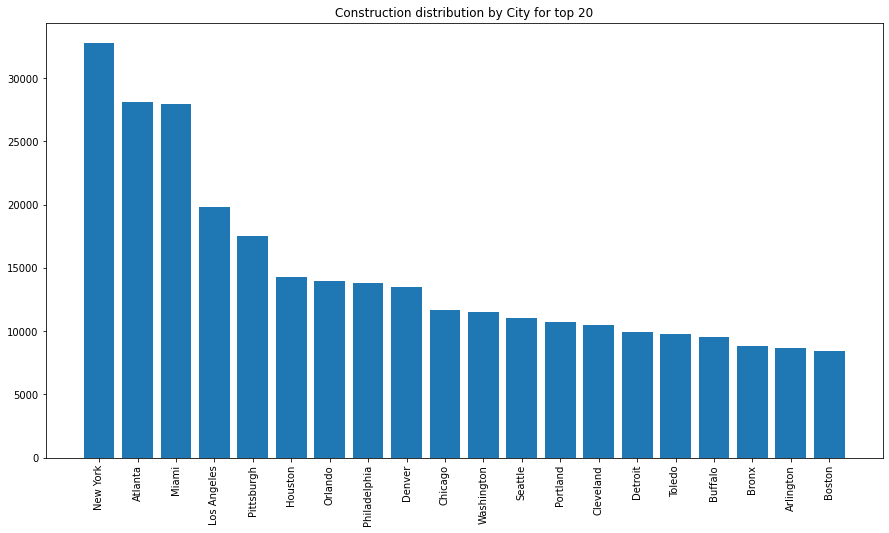

In [17]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_group_count_sorted_top_20['City'], height=df_city_group_count_sorted_top_20['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by City for top 20")
plt.savefig("construction_distribution_by_City_top_20.png")

In [18]:
df_city_MapQuest = df_city[df_city.Source == "MapQuest"]

In [19]:
df_city_MapQuest.head()

,Id,Source,City,State
0,M-29450881,MapQuest,Black River Falls,WI
1,M-29450890,MapQuest,New London,WI
2,M-29450891,MapQuest,New London,WI
3,M-29450947,MapQuest,Loyal,WI
4,M-29450948,MapQuest,Loyal,WI


In [20]:
df_city_MapQuest_group = df_city_MapQuest.groupby("City")

In [21]:
df_city_MapQuest_group.head()

,Id,Source,City,State
0,M-29450881,MapQuest,Black River Falls,WI
1,M-29450890,MapQuest,New London,WI
2,M-29450891,MapQuest,New London,WI
3,M-29450947,MapQuest,Loyal,WI
4,M-29450948,MapQuest,Loyal,WI
...,...,...,...,...
270364,M-37362,MapQuest,Rocklin,CA
270392,M-40006,MapQuest,Bodega Bay,CA
270393,M-40007,MapQuest,Guerneville,CA
270469,M-40987,MapQuest,Montara,CA


In [22]:
df_city_MapQuest_group_count = df_city_MapQuest_group.size().reset_index(name='counts')

In [23]:
df_city_MapQuest_group_count.head()

,City,counts
0,Aaronsburg,1
1,Abbeville,20
2,Abbotsford,15
3,Abbott,5
4,Aberdeen,62


In [24]:
df_city_MapQuest_group_count_sorted = df_city_MapQuest_group_count.sort_values(by=['counts'], ascending=False)

In [25]:
df_city_MapQuest_group_count_sorted.head()

,City,counts
804,Boston,5943
5793,Oklahoma City,3524
4529,Los Angeles,3162
2002,Denver,2802
7145,Seattle,2559


In [26]:
df_city_MapQuest_group_count_sorted_top_20 = df_city_MapQuest_group_count_sorted.head(20)

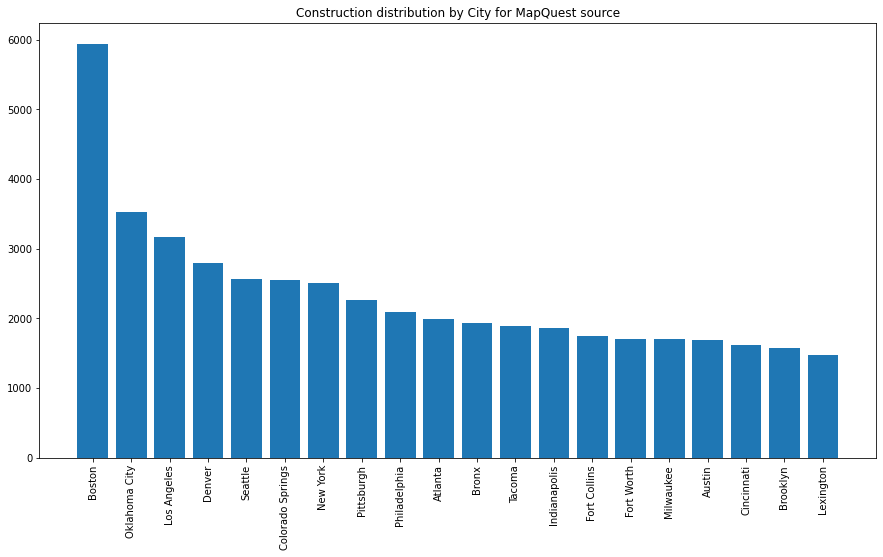

In [27]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_MapQuest_group_count_sorted_top_20['City'], height=df_city_MapQuest_group_count_sorted_top_20['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by City for MapQuest source")
plt.savefig("construction_distribution_by_City_MapQuest.png")

In [28]:
df_city_Bing = df_city[df_city.Source != "MapQuest"]

In [29]:
df_city_Bing.head()

,Id,Source,City,State
270500,B-8859744,Bing,Houston,TX
270501,B-8859745,Bing,Katy,TX
270502,B-8859747,Bing,Houston,TX
270503,B-8859749,Bing,Liberty Hill,TX
270504,B-8859750,Bing,Dickinson,TX


In [30]:
df_city_Bing_group = df_city_Bing.groupby("City")

In [31]:
df_city_Bing_group.head()

,Id,Source,City,State
270500,B-8859744,Bing,Houston,TX
270501,B-8859745,Bing,Katy,TX
270502,B-8859747,Bing,Houston,TX
270503,B-8859749,Bing,Liberty Hill,TX
270504,B-8859750,Bing,Dickinson,TX
...,...,...,...,...
1840394,B-6382,Bing,Cardington,OH
1840395,B-6383,Bing,Cardington,OH
1840396,B-6392,Bing,Leavittsburg,OH
1840397,B-6393,Bing,Leavittsburg,OH


In [32]:
df_city_Bing_group_count = df_city_Bing_group.size().reset_index(name='counts')

In [33]:
df_city_Bing_group_count.head()

,City,counts
0,Aaronsburg,5
1,Abbott,4
2,Abbottstown,56
3,Aberdeen,309
4,Aberdeen-Hoquiam,22


In [34]:
df_city_Bing_group_count_sorted = df_city_Bing_group_count.sort_values(by=['counts'], ascending=False)

In [35]:
df_city_Bing_group_count_sorted.head()

,City,counts
5506,New York,30243
4956,Miami,27137
274,Atlanta,26144
4496,Los Angeles,16656
6263,Pittsburgh,15278


In [36]:
df_city_Bing_group_count_sorted_top_20 = df_city_Bing_group_count_sorted.head(20)

In [37]:
df_city_Bing_group_count_sorted_top_20.head()

,City,counts
5506,New York,30243
4956,Miami,27137
274,Atlanta,26144
4496,Los Angeles,16656
6263,Pittsburgh,15278


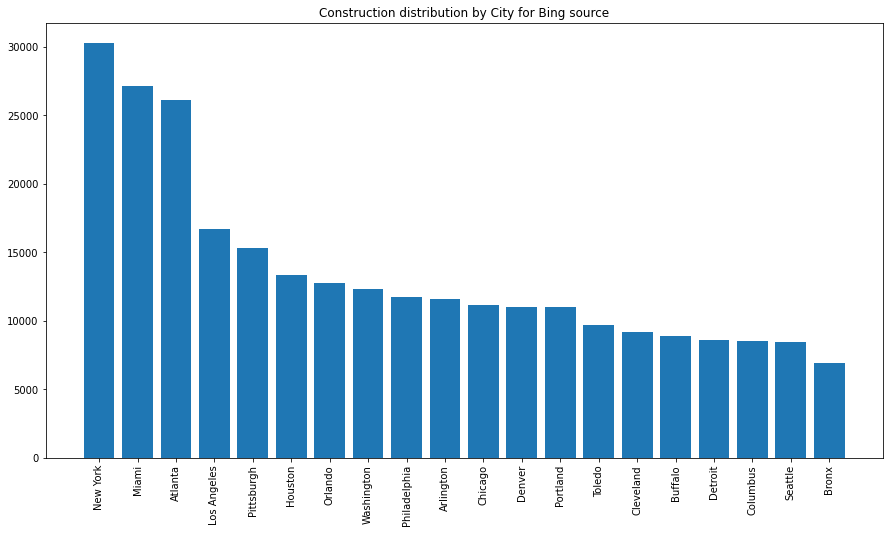

In [38]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_Bing_group_count_sorted_top_20['City'], height=df_city_Bing_group_count_sorted_top_20['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution by City for Bing source")
plt.savefig("construction_distribution_by_City_Bing.png")

In [39]:
path = "/home/amin/CETI/RoadConstruction/CitiesAreaPopulation.csv"

CitiesAreaPopulation = read_data(path)

In [40]:
CitiesAreaPopulation.head()

,Rank,Name,State,Pop,Density(Person/km²),Area (km²)
0,1,New York,New York,8323340,10699,778
1,2,Los Angeles,California,4015940,3306,1215
2,3,Chicago,Illinois,2694240,4575,589
3,4,Houston,Texas,2340890,1412,1658
4,5,Phoenix,Arizona,1703080,1270,1341


In [41]:
CitiesAreaPopulation["Density"] = CitiesAreaPopulation["Pop"] / CitiesAreaPopulation["Area (km²)"]
CitiesAreaPopulation["City"] = CitiesAreaPopulation["Name"]
CitiesAreaPopulation["FullState"] = CitiesAreaPopulation["State"]
CitiesAreaPopulation = CitiesAreaPopulation.drop("State", axis=1)

In [42]:
CitiesAreaPopulation.head()

,Rank,Name,Pop,Density(Person/km²),Area (km²),Density,City,FullState
0,1,New York,8323340,10699,778,10698.380463,New York,New York
1,2,Los Angeles,4015940,3306,1215,3305.300412,Los Angeles,California
2,3,Chicago,2694240,4575,589,4574.261460,Chicago,Illinois
3,4,Houston,2340890,1412,1658,1411.875754,Houston,Texas
4,5,Phoenix,1703080,1270,1341,1270.007457,Phoenix,Arizona


In [43]:
df_city_group_count_sorted_top_20.head()

,City,State,counts
10211,New York,NY,32755
578,Atlanta,GA,28126
9218,Miami,FL,27976
8363,Los Angeles,CA,19818
11495,Pittsburgh,PA,17540


In [44]:
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20.set_index('City').join(CitiesAreaPopulation.set_index('City'))

In [45]:
df_city_group_count_sorted_top_20_density.head(100)

,State,counts,Rank,Name,Pop,Density(Person/km²),Area (km²),Density,FullState
City,,,,,,,,,
Arlington,VA,8657,48,Arlington,402762,1624,248,1624.040323,Texas
Arlington,VA,8657,101,Arlington,231803,3443,67,3459.746269,Virginia
Atlanta,GA,28126,36,Atlanta,523738,1490,352,1487.892045,Georgia
Boston,MA,8430,21,Boston,710195,5673,125,5681.560000,Massachusetts
Bronx,NY,8832,202,Bronx,1418000,230,110,12890.909091,New York
Buffalo,NY,9539,88,Buffalo,255244,2441,105,2430.895238,New York
Chicago,IL,11670,3,Chicago,2694240,4575,589,4574.261460,Illinois
Cleveland,OH,10450,54,Cleveland,379233,1885,201,1886.731343,Ohio
Denver,CO,13527,19,Denver,734134,1849,397,1849.204030,Colorado


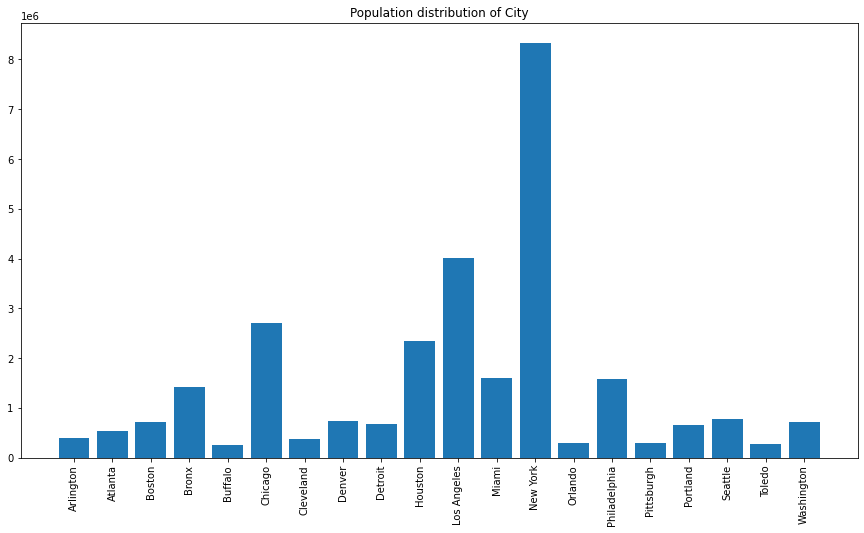

In [46]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_group_count_sorted_top_20_density['Name'], height=df_city_group_count_sorted_top_20_density['Pop'])
a = plt.xticks(rotation = 90)
plt.title("Population distribution of City")
plt.savefig("Population_distribution_by_City.png")

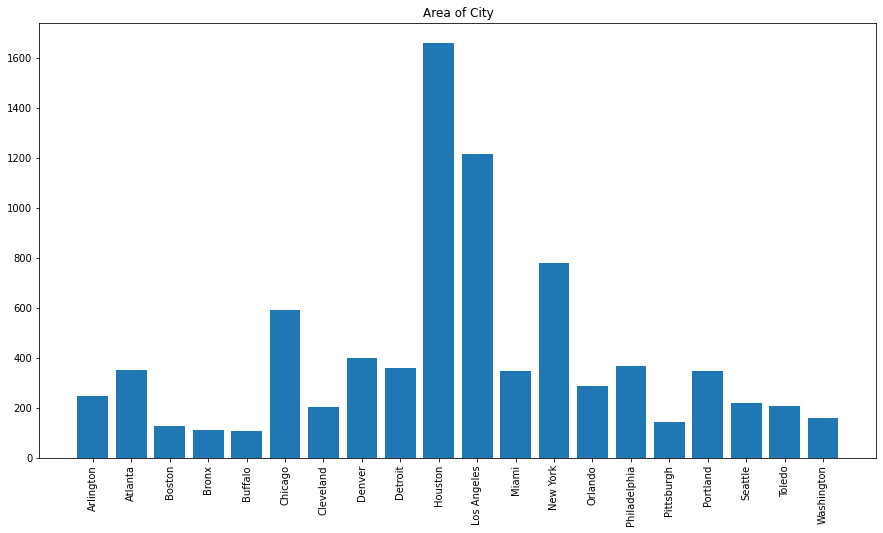

In [47]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_group_count_sorted_top_20_density['Name'], height=df_city_group_count_sorted_top_20_density['Area (km²)'])
a = plt.xticks(rotation = 90)
plt.title("Area of City")
plt.savefig("Area_by_City.png")

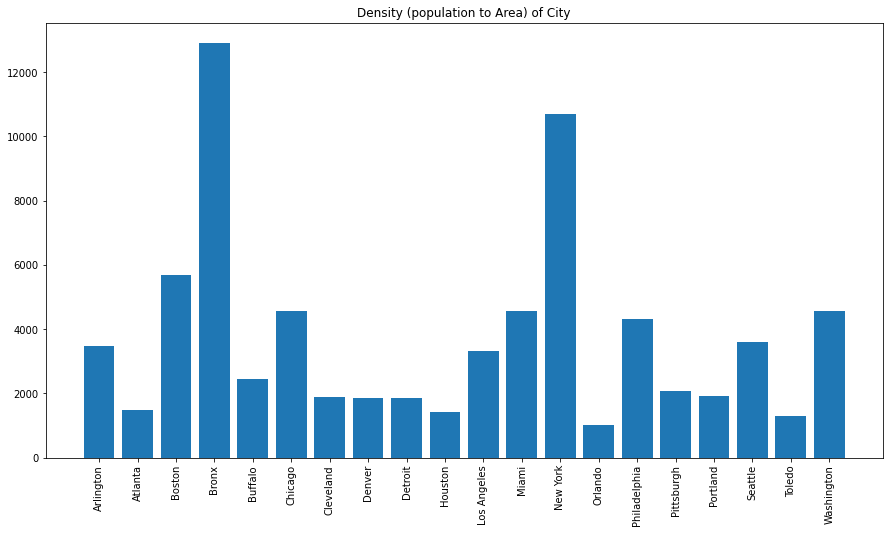

In [48]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_group_count_sorted_top_20_density['Name'], height=df_city_group_count_sorted_top_20_density['Density'])
a = plt.xticks(rotation = 90)
plt.title("Density (population to Area) of City")
plt.savefig("Density_by_City.png")

In [49]:
df_city_group_count_sorted_top_20_density.head()

,State,counts,Rank,Name,Pop,Density(Person/km²),Area (km²),Density,FullState
City,,,,,,,,,
Arlington,VA,8657,48,Arlington,402762,1624,248,1624.040323,Texas
Arlington,VA,8657,101,Arlington,231803,3443,67,3459.746269,Virginia
Atlanta,GA,28126,36,Atlanta,523738,1490,352,1487.892045,Georgia
Boston,MA,8430,21,Boston,710195,5673,125,5681.560000,Massachusetts
Bronx,NY,8832,202,Bronx,1418000,230,110,12890.909091,New York


In [50]:
df_city_group_count_sorted_top_20_density["Count_Population"] = df_city_group_count_sorted_top_20_density["counts"] / df_city_group_count_sorted_top_20_density["Pop"]
df_city_group_count_sorted_top_20_density["Population_Count"] = df_city_group_count_sorted_top_20_density["Pop"] / df_city_group_count_sorted_top_20_density["counts"]

df_city_group_count_sorted_top_20_density["Count_Area"] = df_city_group_count_sorted_top_20_density["counts"] / df_city_group_count_sorted_top_20_density["Area (km²)"]
df_city_group_count_sorted_top_20_density["Area_Count"] = df_city_group_count_sorted_top_20_density["Area (km²)"] / df_city_group_count_sorted_top_20_density["counts"]

df_city_group_count_sorted_top_20_density["Count_Density"] = df_city_group_count_sorted_top_20_density["counts"] / df_city_group_count_sorted_top_20_density["Density"]
df_city_group_count_sorted_top_20_density["Density_Count"] = df_city_group_count_sorted_top_20_density["Density"] / df_city_group_count_sorted_top_20_density["counts"]

In [51]:
df_city_group_count_sorted_top_20_density.head()

,State,counts,Rank,Name,Pop,Density(Person/km²),Area (km²),Density,FullState,Count_Population,Population_Count,Count_Area,Area_Count,Count_Density,Density_Count
City,,,,,,,,,,,,,,,
Arlington,VA,8657,48,Arlington,402762,1624,248,1624.040323,Texas,0.021494,46.524431,34.907258,0.028647,5.330533,0.187599
Arlington,VA,8657,101,Arlington,231803,3443,67,3459.746269,Virginia,0.037346,26.776366,129.208955,0.007739,2.502207,0.399647
Atlanta,GA,28126,36,Atlanta,523738,1490,352,1487.892045,Georgia,0.053702,18.621133,79.903409,0.012515,18.903253,0.052901
Boston,MA,8430,21,Boston,710195,5673,125,5681.560000,Massachusetts,0.011870,84.246145,67.440000,0.014828,1.483747,0.673969
Bronx,NY,8832,202,Bronx,1418000,230,110,12890.909091,New York,0.006228,160.552536,80.290909,0.012455,0.685134,1.459569


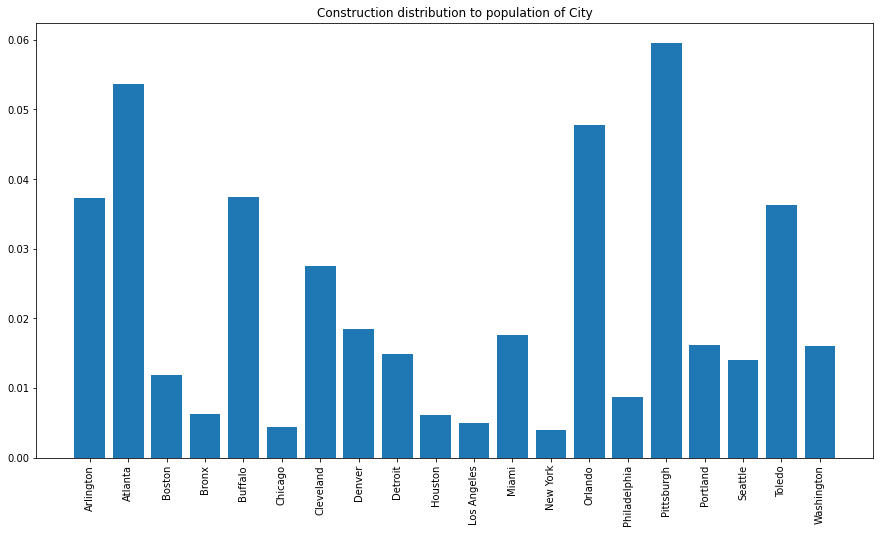

In [52]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_group_count_sorted_top_20_density['Name'], height=df_city_group_count_sorted_top_20_density['Count_Population'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution to population of City")
plt.savefig("Construction_distribution_population_City.png")

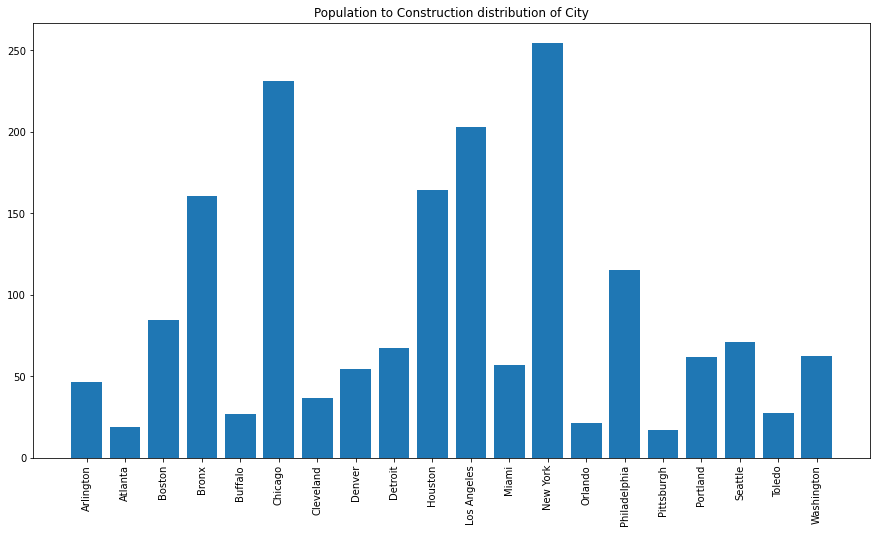

In [53]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_group_count_sorted_top_20_density['Name'], height=df_city_group_count_sorted_top_20_density['Population_Count'])
a = plt.xticks(rotation = 90)
plt.title("Population to Construction distribution of City")
plt.savefig("population_Construction_distribution_City.png")

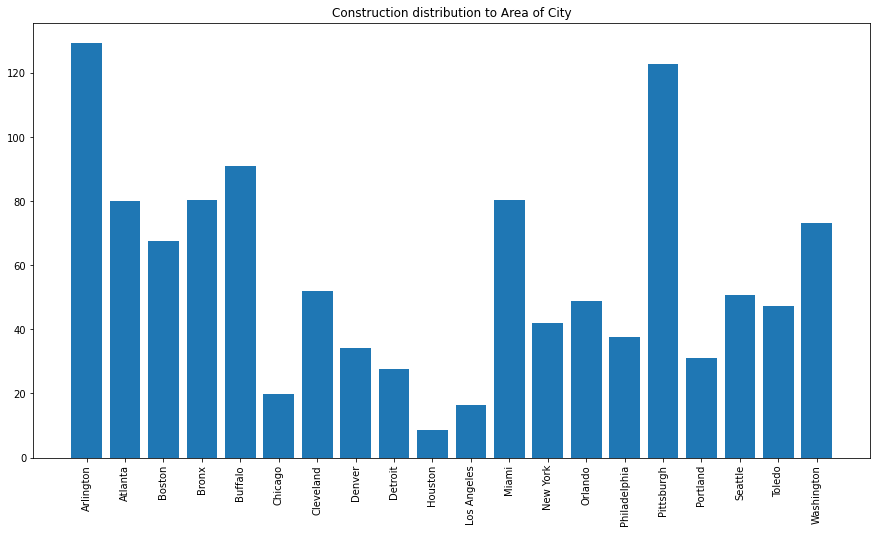

In [54]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_group_count_sorted_top_20_density['Name'], height=df_city_group_count_sorted_top_20_density['Count_Area'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution to Area of City")
plt.savefig("Construction_distribution_Area_City.png")

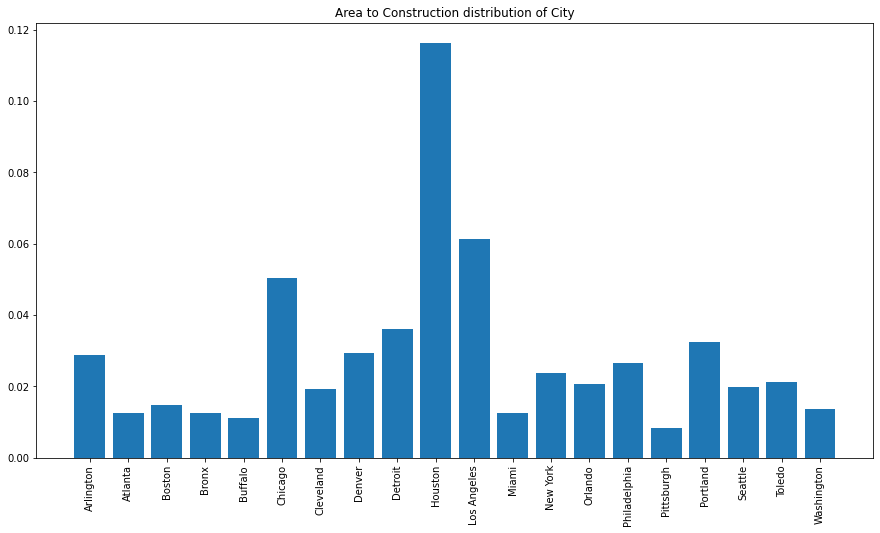

In [55]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_group_count_sorted_top_20_density['Name'], height=df_city_group_count_sorted_top_20_density['Area_Count'])
a = plt.xticks(rotation = 90)
plt.title("Area to Construction distribution of City")
plt.savefig("Area_Construction_distribution_City.png")

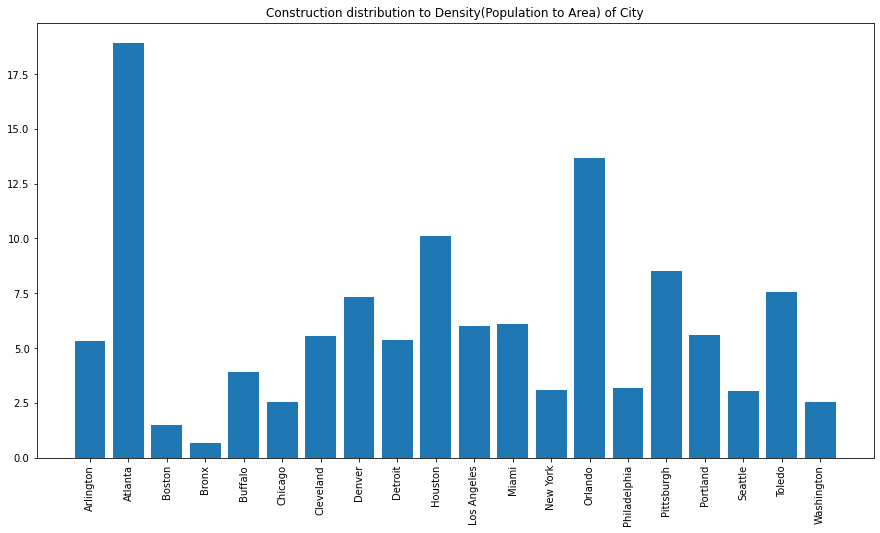

In [56]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_group_count_sorted_top_20_density['Name'], height=df_city_group_count_sorted_top_20_density['Count_Density'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution to Density(Population to Area) of City")
plt.savefig("Construction_distribution_Density_City.png")

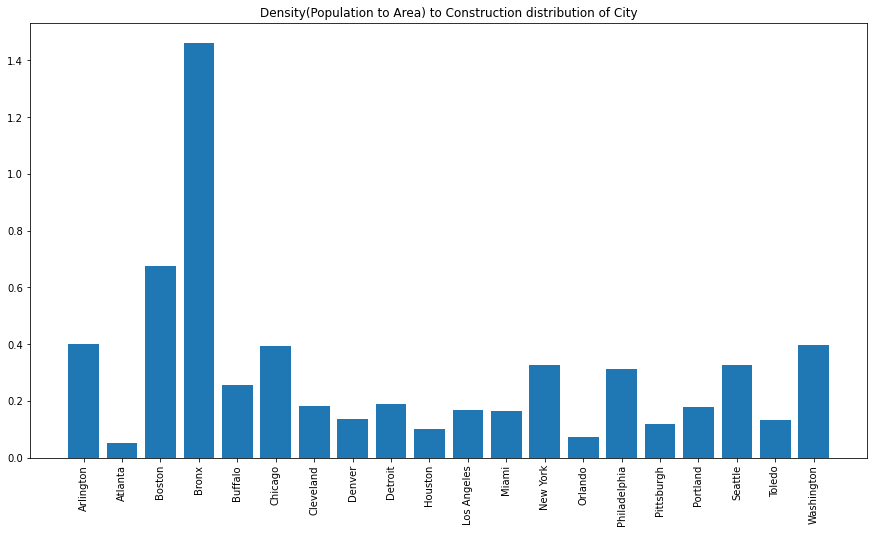

In [57]:
plt.figure(figsize= (15,8))
plt.bar(x=df_city_group_count_sorted_top_20_density['Name'], height=df_city_group_count_sorted_top_20_density['Density_Count'])
a = plt.xticks(rotation = 90)
plt.title("Density(Population to Area) to Construction distribution of City")
plt.savefig("Density_Construction_distribution_City.png")

In [58]:
weather_path = "/home/amin/CETI/RoadConstruction/WeatherEventData/WeatherEvents_Aug16_June20_Publish.csv"

In [59]:
weather_data = read_data(weather_path)

In [60]:
weather_data.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,County,State,ZipCode
0,W-310,Rain,Light,2016-08-01 00:16:00,2016-08-01 00:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
1,W-311,Rain,Light,2016-08-01 01:16:00,2016-08-01 01:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
2,W-312,Rain,Light,2016-08-01 01:56:00,2016-08-01 02:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
3,W-313,Rain,Light,2016-08-01 02:36:00,2016-08-01 02:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0
4,W-314,Rain,Light,2016-08-01 04:36:00,2016-08-01 04:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0


In [61]:
weather_data["NewState"] = weather_data["State"]

In [62]:
weather_data.head()

,EventId,Type,Severity,StartTime(UTC),EndTime(UTC),TimeZone,LocationLat,LocationLng,AirportCode,City,County,State,ZipCode,NewState
0,W-310,Rain,Light,2016-08-01 00:16:00,2016-08-01 00:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0,CO
1,W-311,Rain,Light,2016-08-01 01:16:00,2016-08-01 01:36:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0,CO
2,W-312,Rain,Light,2016-08-01 01:56:00,2016-08-01 02:16:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0,CO
3,W-313,Rain,Light,2016-08-01 02:36:00,2016-08-01 02:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0,CO
4,W-314,Rain,Light,2016-08-01 04:36:00,2016-08-01 04:56:00,US/Mountain,38.0972,-106.1689,K04V,Saguache,Saguache,CO,81149.0,CO


In [63]:
weather_data_city = weather_data.loc[:, weather_data.columns.intersection(['City', 'State', "Id", "AirportCode", "Type", "NewState"])]

In [64]:
weather_data_city.head()

,Type,AirportCode,City,State,NewState
0,Rain,K04V,Saguache,CO,CO
1,Rain,K04V,Saguache,CO,CO
2,Rain,K04V,Saguache,CO,CO
3,Rain,K04V,Saguache,CO,CO
4,Rain,K04V,Saguache,CO,CO


In [65]:
weather_data_city_group = weather_data_city.groupby(["City", "Type", "State"])

In [66]:
weather_data_city_group.head()

,Type,AirportCode,City,State,NewState
0,Rain,K04V,Saguache,CO,CO
1,Rain,K04V,Saguache,CO,CO
2,Rain,K04V,Saguache,CO,CO
3,Rain,K04V,Saguache,CO,CO
4,Rain,K04V,Saguache,CO,CO
...,...,...,...,...,...
5020788,Precipitation,KARL,Rock River,WY,WY
5021477,Precipitation,KARL,Rock River,WY,WY
5021651,Precipitation,KARL,Rock River,WY,WY
5021652,Precipitation,KARL,Rock River,WY,WY


In [67]:
weather_data_city_group_count = weather_data_city_group.size().reset_index(name='counts')

In [68]:
weather_data_city_group_count.head()


,City,Type,State,counts
0,Abbeville,Cold,LA,21
1,Abbeville,Fog,LA,941
2,Abbeville,Precipitation,LA,63
3,Abbeville,Rain,LA,2331
4,Abbeville,Snow,LA,9


In [69]:
weather_data_city_group_count_sorted = weather_data_city_group_count.sort_values(by=['counts'], ascending=False)

In [70]:
weather_data_State_group_count = weather_data_city_group_count_sorted

In [71]:
weather_data_State_group_count_Cold = weather_data_State_group_count[weather_data_State_group_count.Type == "Cold"]

In [72]:
weather_data_State_group_count_Cold.head()

,City,Type,State,counts
3844,Glencoe,Cold,MN,1422
9640,Tehachapi,Cold,CA,1033
10387,Wauseon,Cold,OH,951
1864,Cleveland,Cold,MS,898
6,Aberdeen,Cold,MS,893


In [73]:
weather_data_State_group_count_Cold_top_20 = weather_data_State_group_count_Cold.head(20)

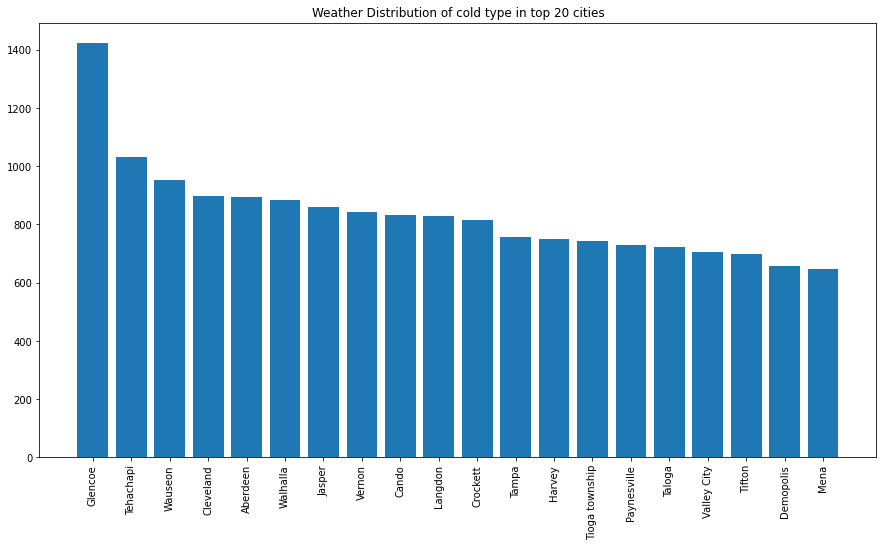

In [74]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Cold_top_20['City'], height=weather_data_State_group_count_Cold_top_20['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of cold type in top 20 cities")
plt.savefig("Weather_Distribution_cold_type_top_20_cities.png")

In [75]:
weather_data_State_group_count_Fog = weather_data_State_group_count[weather_data_State_group_count.Type == "Fog"]

In [76]:
weather_data_State_group_count_Fog.head()

,City,Type,State,counts
2094,Conway,Fog,SC,5105
677,Beaufort,Fog,SC,4338
4246,Half Moon Bay,Fog,CA,4164
6813,Mullan,Fog,ID,3769
6042,Marion,Fog,IN,3669


In [77]:
weather_data_State_group_count_Fog_top_20 = weather_data_State_group_count_Fog.head(20)

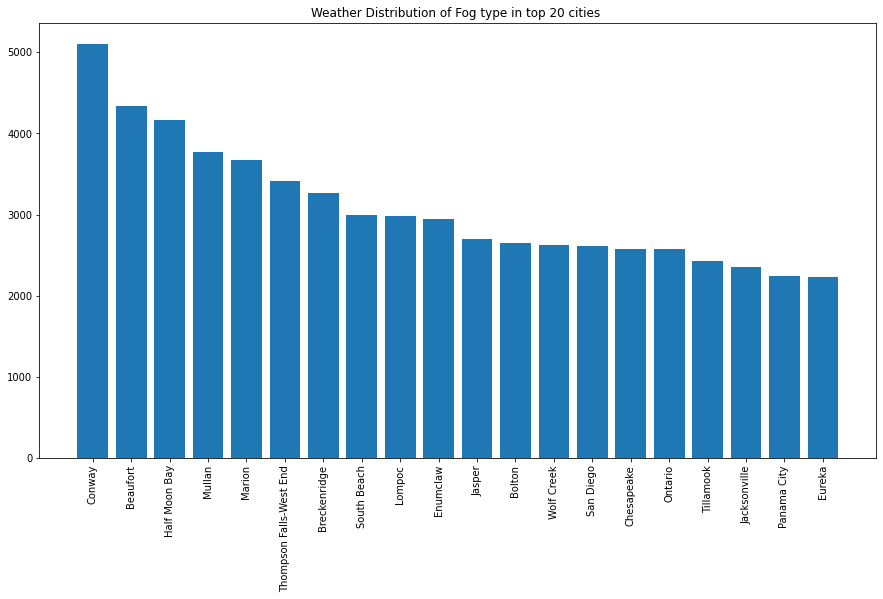

In [78]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Fog_top_20['City'], height=weather_data_State_group_count_Fog_top_20['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of Fog type in top 20 cities ")
plt.savefig("Weather_Distribution_Fog_type_top_20_cities.png")

In [79]:
weather_data_State_group_count_Hail = weather_data_State_group_count[weather_data_State_group_count.Type == "Hail"]

In [80]:
weather_data_State_group_count_Hail.head()

,City,Type,State,counts
4034,Grayling,Hail,MI,234
5449,Latham,Hail,NY,66
2000,Colorado Springs,Hail,CO,41
10697,Windsor Locks,Hail,CT,37
4500,Hill AFB,Hail,UT,36


In [81]:
weather_data_State_group_count_Hail_top_20 = weather_data_State_group_count_Hail.head(20)

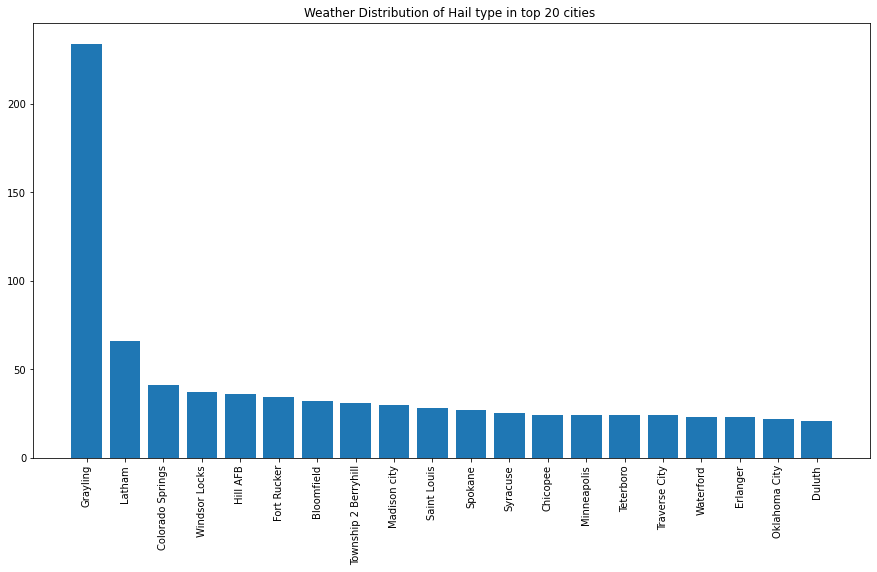

In [82]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Hail_top_20['City'], height=weather_data_State_group_count_Hail_top_20['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of Hail type in top 20 cities ")
plt.savefig("Weather_Distribution_Hail_type_top_20_cities.png")

In [83]:
weather_data_State_group_count_Precipitation = weather_data_State_group_count[weather_data_State_group_count.Type == "Precipitation"]

In [84]:
weather_data_State_group_count_Precipitation.head()

,City,Type,State,counts
7043,New York,Precipitation,NY,2291
6998,New Orleans,Precipitation,LA,423
4688,Huntingburg,Precipitation,IN,320
4672,Houston,Precipitation,TX,292
4899,Jacksonville,Precipitation,FL,264


In [85]:
weather_data_State_group_count_Precipitation_top_20 = weather_data_State_group_count_Precipitation.head(20)

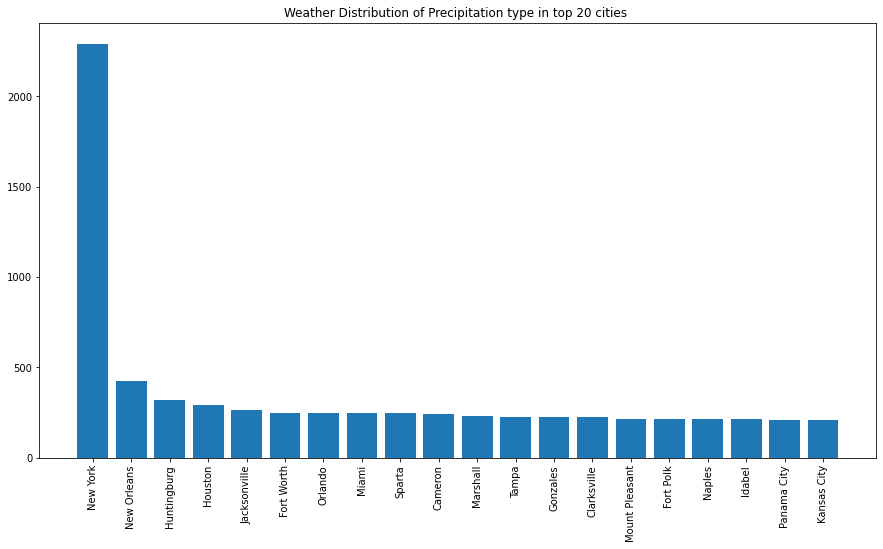

In [86]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Precipitation_top_20['City'], height=weather_data_State_group_count_Precipitation_top_20['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of Precipitation type in top 20 cities ")
plt.savefig("Weather_Distribution_Precipitation_type_top_20_cities.png")

In [87]:
weather_data_State_group_count_Rain = weather_data_State_group_count[weather_data_State_group_count.Type == "Rain"]

In [88]:
weather_data_State_group_count_Rain.head()

,City,Type,State,counts
9221,South Beach,Rain,OR,9105
9615,Tampa,Rain,FL,8860
9773,Tillamook,Rain,OR,7845
4903,Jacksonville,Rain,FL,7797
7650,Panama City,Rain,FL,7544


In [89]:
weather_data_State_group_count_Rain_top_20 = weather_data_State_group_count_Rain.head(20)

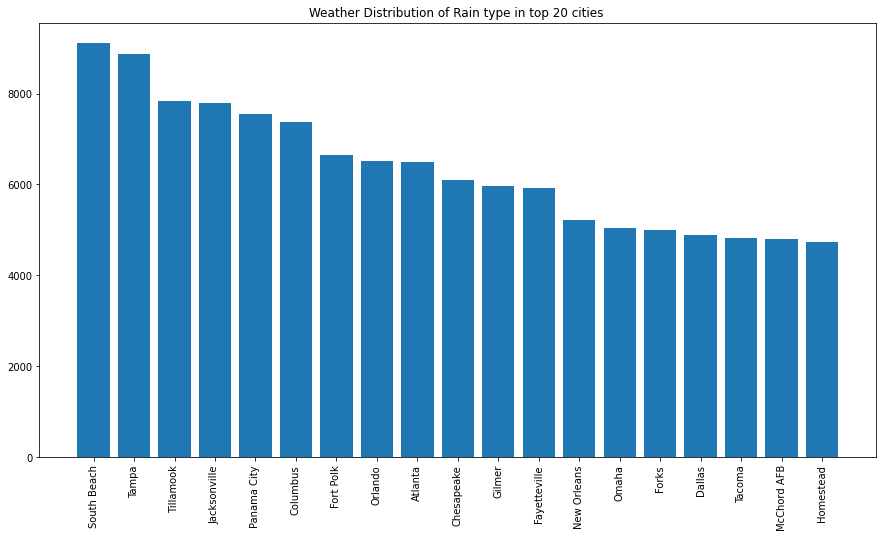

In [90]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Rain_top_20['City'], height=weather_data_State_group_count_Rain_top_20['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of Rain type in top 20 cities ")
plt.savefig("Weather_Distribution_Rain_type_top_20_cities.png")

In [91]:
weather_data_State_group_count_Snow = weather_data_State_group_count[weather_data_State_group_count.Type == "Snow"]

In [92]:
weather_data_State_group_count_Snow.head()

,City,Type,State,counts
9742,Thompson Falls-West End,Snow,MT,4410
6816,Mullan,Snow,ID,3835
1549,Casper,Snow,WY,3350
1243,Buffalo,Snow,WY,2934
9978,Two Harbors,Snow,MN,2645


In [93]:
weather_data_State_group_count_Snow_top_20 = weather_data_State_group_count_Snow.head(20)

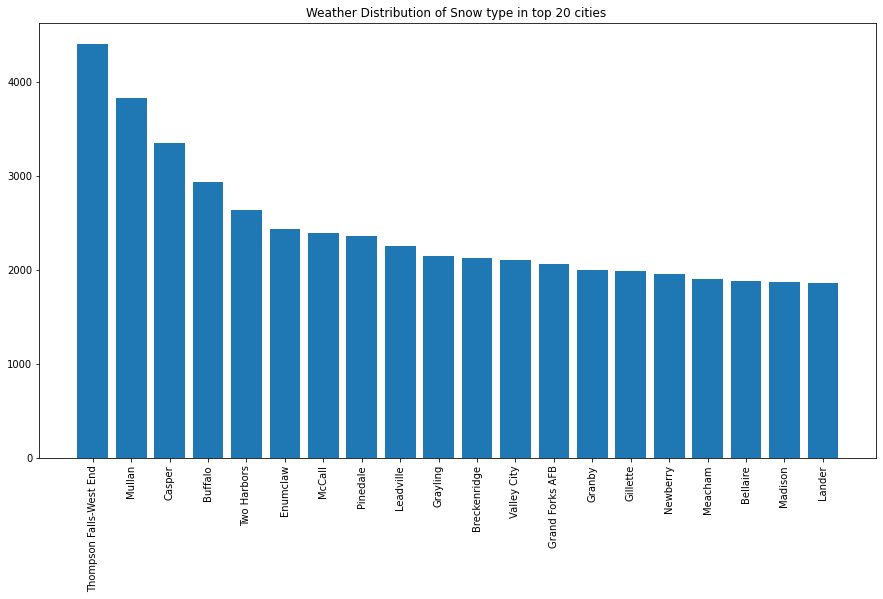

In [94]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Snow_top_20['City'], height=weather_data_State_group_count_Snow_top_20['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of Snow type in top 20 cities ")
plt.savefig("Weather_Distribution_Snow_type_top_20_cities.png")

In [95]:
weather_data_State_group_count_Storm = weather_data_State_group_count[weather_data_State_group_count.Type == "Storm"]

In [96]:
weather_data_State_group_count_Storm.head()

,City,Type,State,counts
3953,Granby,Storm,CO,1898
4198,Gunnison,Storm,CO,1767
8924,Sargents,Storm,NH,1476
8778,Salt Flat,Storm,TX,785
8481,Rock River,Storm,WY,551


In [97]:
weather_data_State_group_count_Storm_top_20 = weather_data_State_group_count_Storm.head(20)

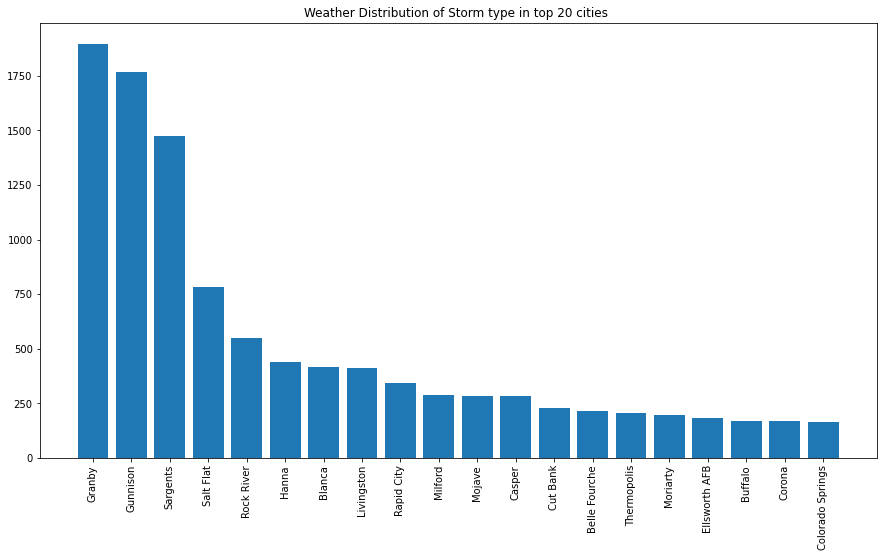

In [98]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_State_group_count_Storm_top_20['City'], height=weather_data_State_group_count_Storm_top_20['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution of Storm type in top 20 cities ")
plt.savefig("Weather_Distribution_Storm_type_top_20_cities.png")

In [99]:
weather_data_State_group_count.head(-20)

,City,Type,State,counts
9221,South Beach,Rain,OR,9105
9615,Tampa,Rain,FL,8860
9773,Tillamook,Rain,OR,7845
4903,Jacksonville,Rain,FL,7797
7650,Panama City,Rain,FL,7544
...,...,...,...,...
2859,Eglin Afb,Storm,FL,1
761,Belleville,Hail,MI,1
9710,Thermal,Storm,CA,1
8828,San Luis Obispo,Storm,CA,1


In [100]:
weather_data_city_group_only = weather_data_city.groupby(["City", "State"])

In [101]:
weather_data_city_group_only_count = weather_data_city_group_only.size().reset_index(name='counts')

In [102]:
weather_data_city_group_only_count.head()

,City,State,counts
0,Abbeville,LA,3368
1,Aberdeen,MS,5476
2,Aberdeen,SD,2193
3,Aberdeen Proving Ground,MD,1863
4,Abilene,TX,1468


In [103]:
weather_data_city_group_only_count_sorted = weather_data_city_group_only_count.sort_values(by=['counts'], ascending=False)

In [104]:
weather_data_city_group_only_count_sorted_top_20 = weather_data_city_group_only_count_sorted.head(20)

In [105]:
weather_data_city_group_only_count_sorted_top_20.head()

,City,State,counts
1641,South Beach,OR,12274
1713,Tampa,FL,12017
1741,Tillamook,OR,11047
367,Columbus,OH,10869
871,Jacksonville,FL,10830


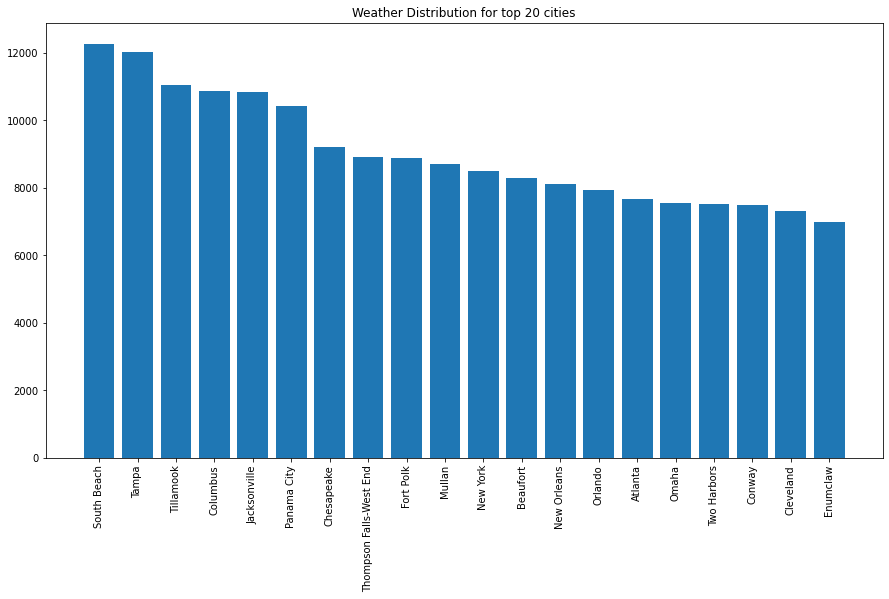

In [106]:
plt.figure(figsize= (15,8))
plt.bar(x=weather_data_city_group_only_count_sorted_top_20['City'], height=weather_data_city_group_only_count_sorted_top_20['counts'])
a = plt.xticks(rotation = 90)
plt.title("Weather Distribution for top 20 cities")
plt.savefig("Weather_Distribution_for_top_20_cities.png")

In [107]:
weather_data_State_group_count_Cold.head()

,City,Type,State,counts
3844,Glencoe,Cold,MN,1422
9640,Tehachapi,Cold,CA,1033
10387,Wauseon,Cold,OH,951
1864,Cleveland,Cold,MS,898
6,Aberdeen,Cold,MS,893


In [108]:
weather_data_State_group_count_Cold["ColdCount"] = weather_data_State_group_count_Cold["counts"]
weather_data_State_group_count_Cold = weather_data_State_group_count_Cold.drop("counts", axis=1)

<ipython-input-108-245cd3ab69ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_State_group_count_Cold["ColdCount"] = weather_data_State_group_count_Cold["counts"]


In [109]:
weather_data_State_group_count_Cold.head()

,City,Type,State,ColdCount
3844,Glencoe,Cold,MN,1422
9640,Tehachapi,Cold,CA,1033
10387,Wauseon,Cold,OH,951
1864,Cleveland,Cold,MS,898
6,Aberdeen,Cold,MS,893


In [110]:
weather_data_State_group_count_Fog.head()

,City,Type,State,counts
2094,Conway,Fog,SC,5105
677,Beaufort,Fog,SC,4338
4246,Half Moon Bay,Fog,CA,4164
6813,Mullan,Fog,ID,3769
6042,Marion,Fog,IN,3669


In [111]:
weather_data_State_group_count_Fog["FogCount"] = weather_data_State_group_count_Fog["counts"]
weather_data_State_group_count_Fog = weather_data_State_group_count_Fog.drop("counts", axis=1)

<ipython-input-111-6a6350131c06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_State_group_count_Fog["FogCount"] = weather_data_State_group_count_Fog["counts"]


In [112]:
weather_data_State_group_count_Fog.head()

,City,Type,State,FogCount
2094,Conway,Fog,SC,5105
677,Beaufort,Fog,SC,4338
4246,Half Moon Bay,Fog,CA,4164
6813,Mullan,Fog,ID,3769
6042,Marion,Fog,IN,3669


In [113]:
weather_data_State_group_count_Precipitation.head()

,City,Type,State,counts
7043,New York,Precipitation,NY,2291
6998,New Orleans,Precipitation,LA,423
4688,Huntingburg,Precipitation,IN,320
4672,Houston,Precipitation,TX,292
4899,Jacksonville,Precipitation,FL,264


In [114]:
weather_data_State_group_count_Precipitation["PrecipitationCount"] = weather_data_State_group_count_Precipitation["counts"]
weather_data_State_group_count_Precipitation = weather_data_State_group_count_Precipitation.drop("counts", axis=1)

<ipython-input-114-6fc5e08d4d13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_State_group_count_Precipitation["PrecipitationCount"] = weather_data_State_group_count_Precipitation["counts"]


In [115]:
weather_data_State_group_count_Precipitation.head()

,City,Type,State,PrecipitationCount
7043,New York,Precipitation,NY,2291
6998,New Orleans,Precipitation,LA,423
4688,Huntingburg,Precipitation,IN,320
4672,Houston,Precipitation,TX,292
4899,Jacksonville,Precipitation,FL,264


In [116]:
weather_data_State_group_count_Rain.head()

,City,Type,State,counts
9221,South Beach,Rain,OR,9105
9615,Tampa,Rain,FL,8860
9773,Tillamook,Rain,OR,7845
4903,Jacksonville,Rain,FL,7797
7650,Panama City,Rain,FL,7544


In [117]:
weather_data_State_group_count_Rain["RainCount"] = weather_data_State_group_count_Rain["counts"]
weather_data_State_group_count_Rain = weather_data_State_group_count_Rain.drop("counts", axis=1)

<ipython-input-117-babeff67d126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_State_group_count_Rain["RainCount"] = weather_data_State_group_count_Rain["counts"]


In [118]:
weather_data_State_group_count_Rain.head()

,City,Type,State,RainCount
9221,South Beach,Rain,OR,9105
9615,Tampa,Rain,FL,8860
9773,Tillamook,Rain,OR,7845
4903,Jacksonville,Rain,FL,7797
7650,Panama City,Rain,FL,7544


In [119]:
weather_data_State_group_count_Snow.head()

,City,Type,State,counts
9742,Thompson Falls-West End,Snow,MT,4410
6816,Mullan,Snow,ID,3835
1549,Casper,Snow,WY,3350
1243,Buffalo,Snow,WY,2934
9978,Two Harbors,Snow,MN,2645


In [120]:
weather_data_State_group_count_Snow["SnowCount"] = weather_data_State_group_count_Snow["counts"]
weather_data_State_group_count_Snow = weather_data_State_group_count_Snow.drop("counts", axis=1)

<ipython-input-120-2c70935c2199>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_State_group_count_Snow["SnowCount"] = weather_data_State_group_count_Snow["counts"]


In [121]:
weather_data_State_group_count_Snow.head()

,City,Type,State,SnowCount
9742,Thompson Falls-West End,Snow,MT,4410
6816,Mullan,Snow,ID,3835
1549,Casper,Snow,WY,3350
1243,Buffalo,Snow,WY,2934
9978,Two Harbors,Snow,MN,2645


In [122]:
weather_data_State_group_count_Storm.head()

,City,Type,State,counts
3953,Granby,Storm,CO,1898
4198,Gunnison,Storm,CO,1767
8924,Sargents,Storm,NH,1476
8778,Salt Flat,Storm,TX,785
8481,Rock River,Storm,WY,551


In [123]:
weather_data_State_group_count_Storm["StormCount"] = weather_data_State_group_count_Storm["counts"]
weather_data_State_group_count_Storm = weather_data_State_group_count_Storm.drop("counts", axis=1)

<ipython-input-123-d0d33a220162>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_State_group_count_Storm["StormCount"] = weather_data_State_group_count_Storm["counts"]


In [124]:
weather_data_State_group_count_Storm.head()

,City,Type,State,StormCount
3953,Granby,Storm,CO,1898
4198,Gunnison,Storm,CO,1767
8924,Sargents,Storm,NH,1476
8778,Salt Flat,Storm,TX,785
8481,Rock River,Storm,WY,551


In [125]:
df_city_group_count_sorted_top_20_density.head(20)

,State,counts,Rank,Name,Pop,Density(Person/km²),Area (km²),Density,FullState,Count_Population,Population_Count,Count_Area,Area_Count,Count_Density,Density_Count
City,,,,,,,,,,,,,,,
Arlington,VA,8657,48,Arlington,402762,1624,248,1624.040323,Texas,0.021494,46.524431,34.907258,0.028647,5.330533,0.187599
Arlington,VA,8657,101,Arlington,231803,3443,67,3459.746269,Virginia,0.037346,26.776366,129.208955,0.007739,2.502207,0.399647
Atlanta,GA,28126,36,Atlanta,523738,1490,352,1487.892045,Georgia,0.053702,18.621133,79.903409,0.012515,18.903253,0.052901
Boston,MA,8430,21,Boston,710195,5673,125,5681.560000,Massachusetts,0.011870,84.246145,67.440000,0.014828,1.483747,0.673969
Bronx,NY,8832,202,Bronx,1418000,230,110,12890.909091,New York,0.006228,160.552536,80.290909,0.012455,0.685134,1.459569
Buffalo,NY,9539,88,Buffalo,255244,2441,105,2430.895238,New York,0.037372,26.757941,90.847619,0.011007,3.924069,0.254838
Chicago,IL,11670,3,Chicago,2694240,4575,589,4574.261460,Illinois,0.004331,230.868895,19.813243,0.050471,2.551232,0.391968
Cleveland,OH,10450,54,Cleveland,379233,1885,201,1886.731343,Ohio,0.027556,36.290239,51.990050,0.019234,5.538679,0.180548
Denver,CO,13527,19,Denver,734134,1849,397,1849.204030,Colorado,0.018426,54.271753,34.073048,0.029349,7.315039,0.136705


In [126]:
weather_data_State_group_count_Cold = weather_data_State_group_count_Cold.drop("Type", axis=1)
# df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.drop("State", axis = 1)
df_city_group_count_sorted_top_20_density["City1"] = df_city_group_count_sorted_top_20_density["Name"]


In [129]:
df_city_group_count_sorted_top_20_density.head(20)
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density[df_city_group_count_sorted_top_20_density.Rank != 48]

In [130]:
df_city_group_count_sorted_top_20_density.head(20)


,State,counts,Rank,Name,Pop,Density(Person/km²),Area (km²),Density,FullState,Count_Population,Population_Count,Count_Area,Area_Count,Count_Density,Density_Count,City1
City,,,,,,,,,,,,,,,,
Arlington,VA,8657,101,Arlington,231803,3443,67,3459.746269,Virginia,0.037346,26.776366,129.208955,0.007739,2.502207,0.399647,Arlington
Atlanta,GA,28126,36,Atlanta,523738,1490,352,1487.892045,Georgia,0.053702,18.621133,79.903409,0.012515,18.903253,0.052901,Atlanta
Boston,MA,8430,21,Boston,710195,5673,125,5681.560000,Massachusetts,0.011870,84.246145,67.440000,0.014828,1.483747,0.673969,Boston
Bronx,NY,8832,202,Bronx,1418000,230,110,12890.909091,New York,0.006228,160.552536,80.290909,0.012455,0.685134,1.459569,Bronx
Buffalo,NY,9539,88,Buffalo,255244,2441,105,2430.895238,New York,0.037372,26.757941,90.847619,0.011007,3.924069,0.254838,Buffalo
Chicago,IL,11670,3,Chicago,2694240,4575,589,4574.261460,Illinois,0.004331,230.868895,19.813243,0.050471,2.551232,0.391968,Chicago
Cleveland,OH,10450,54,Cleveland,379233,1885,201,1886.731343,Ohio,0.027556,36.290239,51.990050,0.019234,5.538679,0.180548,Cleveland
Denver,CO,13527,19,Denver,734134,1849,397,1849.204030,Colorado,0.018426,54.271753,34.073048,0.029349,7.315039,0.136705,Denver
Detroit,MI,9937,24,Detroit,667272,1857,359,1858.696379,Michigan,0.014892,67.150247,27.679666,0.036128,5.346220,0.187048,Detroit


In [131]:
weather_data_State_group_count_Cold.head()

,City,State,ColdCount
3844,Glencoe,MN,1422
9640,Tehachapi,CA,1033
10387,Wauseon,OH,951
1864,Cleveland,MS,898
6,Aberdeen,MS,893


In [139]:
names = df_city_group_count_sorted_top_20_density["Name"]

In [141]:
names

KeyError: 'City'

In [132]:
df_city_group_count_sorted_top_20_density_ = df_city_group_count_sorted_top_20_density.set_index(['City1', "State"]).join(weather_data_State_group_count_Cold.set_index(['City', "State"]))

In [133]:
df_city_group_count_sorted_top_20_density_.head()

counts  Rank         Name      Pop  \
State City1       City                                                 
CA    Los Angeles Tehachapi        19818     2  Los Angeles  4015940   
                  Half Moon Bay    19818     2  Los Angeles  4015940   
                  Petaluma         19818     2  Los Angeles  4015940   
                  Imperial Beach   19818     2  Los Angeles  4015940   
                  Camp Pendleton   19818     2  Los Angeles  4015940   

                                  Density(Person/km²)  Area (km²)  \
State City1       City                                              
CA    Los Angeles Tehachapi                      3306        1215   
                  Half Moon Bay                  3306        1215   
                  Petaluma                       3306        1215   
                  Imperial Beach                 3306        1215   
                  Camp Pendleton                 3306        1215   

                                      Density   FullState  Count_Population  \
State City1       City                                                        
CA    Los Angeles Tehachapi       3305.300412  California          0.004935   
                  Half Moon Bay   3305.300412  California          0.004935   
                  Petaluma        3305.300412  California          0.004935   
                  Imperial Beach  3305.300412  California          0.004935   
                  Camp Pendleton  3305.300412  California          0.004935   

                                  Population_Count  Count_Area  Area_Count  \
State City1       City                                                       
CA    Los Angeles Tehachapi             202.641033   16.311111    0.061308   
                  Half Moon Bay         202.641033   16.311111    0.061308   
                  Petaluma              202.641033   16.311111    0.061308   
                  Imperial Beach        202.641033   16.311111    0.061308   
                  Camp Pendleton        202.641033   16.311111    0.061308   

                                  Count_Density  Density_Count  ColdCount  
State City1       City                                                     
CA    Los Angeles Tehachapi            5.995824       0.166783     1033.0  
                  Half Moon Bay        5.995824       0.166783      456.0  
                  Petaluma             5.995824       0.166783      454.0  
                  Imperial Beach       5.995824       0.166783      360.0  
                  Camp Pendleton       5.995824       0.166783      347.0

In [135]:
df_city_group_count_sorted_top_20_density_.head()

,counts,Rank,Name,Pop,Density(Person/km²),Area (km²),Density,FullState,Count_Population,Population_Count,Count_Area,Area_Count,Count_Density,Density_Count,State,ColdCount
Arlington,8657,48,Arlington,402762,1624,248,1624.040323,Texas,0.021494,46.524431,34.907258,0.028647,5.330533,0.187599,TX,54.0
Arlington,8657,48,Arlington,402762,1624,248,1624.040323,Texas,0.021494,46.524431,34.907258,0.028647,5.330533,0.187599,WA,37.0
Arlington,8657,48,Arlington,402762,1624,248,1624.040323,Texas,0.021494,46.524431,34.907258,0.028647,5.330533,0.187599,VA,1.0
Arlington,8657,101,Arlington,231803,3443,67,3459.746269,Virginia,0.037346,26.776366,129.208955,0.007739,2.502207,0.399647,TX,54.0
Arlington,8657,101,Arlington,231803,3443,67,3459.746269,Virginia,0.037346,26.776366,129.208955,0.007739,2.502207,0.399647,WA,37.0


In [ ]:
df_city_group_count_sorted_top_20_density.head()

In [ ]:
weather_data_State_group_count_Fog.head()

In [ ]:
weather_data_State_group_count_Fog = weather_data_State_group_count_Fog.drop("Type", axis=1)
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.drop("State", axis = 1)

df_city_group_count_sorted_top_20_density["City"] = df_city_group_count_sorted_top_20_density["Name"]
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.set_index('City').join(weather_data_State_group_count_Fog.set_index('City'))

In [ ]:
df_city_group_count_sorted_top_20_density.head()

In [ ]:
weather_data_State_group_count_Precipitation = weather_data_State_group_count_Precipitation.drop("Type", axis=1)
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.drop("State", axis = 1)

df_city_group_count_sorted_top_20_density["City"] = df_city_group_count_sorted_top_20_density["Name"]
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.set_index('City').join(weather_data_State_group_count_Precipitation.set_index('City'))

In [ ]:
df_city_group_count_sorted_top_20_density.head()

In [ ]:
weather_data_State_group_count_Rain = weather_data_State_group_count_Rain.drop("Type", axis=1)
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.drop("State", axis = 1)

df_city_group_count_sorted_top_20_density["City"] = df_city_group_count_sorted_top_20_density["Name"]
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.set_index('City').join(weather_data_State_group_count_Rain.set_index('City'))

In [ ]:
df_city_group_count_sorted_top_20_density.head()

In [ ]:
weather_data_State_group_count_Snow = weather_data_State_group_count_Snow.drop("Type", axis=1)
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.drop("State", axis = 1)

df_city_group_count_sorted_top_20_density["City"] = df_city_group_count_sorted_top_20_density["Name"]
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.set_index('City').join(weather_data_State_group_count_Snow.set_index('City'))

In [ ]:
df_city_group_count_sorted_top_20_density.head()

In [ ]:
weather_data_State_group_count_Storm = weather_data_State_group_count_Storm.drop("Type", axis=1)
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.drop("State", axis = 1)

df_city_group_count_sorted_top_20_density["City"] = df_city_group_count_sorted_top_20_density["Name"]
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.set_index('City').join(weather_data_State_group_count_Storm.set_index('City'))

In [ ]:
df_city_group_count_sorted_top_20_density.head()

In [ ]:
weather_data_city_group_only_count_sorted.head()

In [ ]:
weather_data_city_group_only_count_sorted["WeatherCount"] = weather_data_city_group_only_count_sorted["counts"]

In [ ]:
weather_data_city_group_only_count_sorted = weather_data_city_group_only_count_sorted.drop("counts", axis=1)

In [ ]:
weather_data_city_group_only_count_sorted.head()

In [ ]:
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.drop("State", axis = 1)

df_city_group_count_sorted_top_20_density["City"] = df_city_group_count_sorted_top_20_density["Name"]
df_city_group_count_sorted_top_20_density = df_city_group_count_sorted_top_20_density.set_index('City').join(weather_data_city_group_only_count_sorted.set_index('City'))

In [ ]:
df_city_group_count_sorted_top_20_density.head(40)